### 调整模型结构 观察训练结果

In [1]:

# 导入必要包
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms.v2 import ToTensor     # 转换图像数据为张量
from torchvision.datasets import KMNIST
from torch.utils.data import DataLoader  # 数据加载器

In [2]:

# 定义超参数
LR = 1e-2
epochs = 20
BATCH_SIZE = 128

In [3]:

# 数据集加载
train_data = KMNIST(root='./data', train=True, download=True, 
                          transform=ToTensor())
test_data = KMNIST(root='./data', train=False, download=True,
                         transform=ToTensor())

d:\Users\helen\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\transforms\v2\_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [ ]:
trian_dl = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)  # shuffle=True表示打乱数据
test_dl = DataLoader(test_data, batch_size=BATCH_SIZE)

In [5]:

def train_iter(epochs, model, trian_dl):
    train_hist = []

    # 损失函数&优化器
    loss_fn = nn.CrossEntropyLoss()  # 交叉熵损失函数
    # 优化器（模型参数更新）
    optimizer = torch.optim.SGD(model.parameters(), lr=LR)

    for epoch in range(epochs):
        # 提取训练数据
        for data, target in trian_dl:
            # 前向运算
            output = model(data.reshape(-1, 784))
            # 计算损失
            loss = loss_fn(output, target)
            # 反向传播
            optimizer.zero_grad()  # 所有参数梯度清零
            loss.backward()     # 计算梯度（参数.grad）
            optimizer.step()    # 更新参数

        print(f'Epoch:{epoch} Loss: {loss.item()}')
        train_hist.append(loss.item())

    return train_hist

In [6]:

def draw_train_hist(hist):
    import matplotlib.pyplot as plt
    plt.plot(hist)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.show()

In [7]:

# 测试
def test_acc(test_dl, model):
    correct = 0
    total = 0
    with torch.no_grad():  # 不计算梯度
        for data, target in test_dl:
            output = model(data.reshape(-1, 784))
            _, predicted = torch.max(output, 1)  # 返回每行最大值和索引
            total += target.size(0)  # size(0) 等效 shape[0]
            correct += (predicted == target).sum().item()
    return correct/total*100

In [8]:

# 定义模型
model1 = nn.Sequential(
    nn.Linear(784, 512),
    nn.Sigmoid(),
    nn.Linear(512, 256),
    nn.Sigmoid(),
    nn.Linear(256, 10)
)

In [9]:

model2 = nn.Sequential(
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

In [10]:

model3 = nn.Sequential(
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Linear(512, 10)
)

In [11]:

model1_hist = train_iter(epochs, model1, trian_dl)
model2_hist = train_iter(epochs, model2, trian_dl)
model3_hist = train_iter(epochs, model3, trian_dl)

Epoch:0 Loss: 2.302126407623291
Epoch:1 Loss: 2.2900009155273438
Epoch:2 Loss: 2.2882065773010254
Epoch:3 Loss: 2.2939395904541016
Epoch:4 Loss: 2.2745378017425537
Epoch:5 Loss: 2.2521893978118896
Epoch:6 Loss: 2.246354341506958
Epoch:7 Loss: 2.179192543029785
Epoch:8 Loss: 2.1147477626800537
Epoch:9 Loss: 1.9747394323349
Epoch:10 Loss: 1.8806461095809937
Epoch:11 Loss: 1.8778780698776245
Epoch:12 Loss: 1.837942123413086
Epoch:13 Loss: 1.86183500289917
Epoch:14 Loss: 1.7543262243270874
Epoch:15 Loss: 1.6491035223007202
Epoch:16 Loss: 1.464561939239502
Epoch:17 Loss: 1.4825888872146606
Epoch:18 Loss: 1.2649061679840088
Epoch:19 Loss: 1.121590495109558
Epoch:0 Loss: 1.756445288658142
Epoch:1 Loss: 0.9969117641448975
Epoch:2 Loss: 0.7444987297058105
Epoch:3 Loss: 0.5884971022605896
Epoch:4 Loss: 0.4944174289703369
Epoch:5 Loss: 0.6536849141120911
Epoch:6 Loss: 0.4917043149471283
Epoch:7 Loss: 0.5207744836807251
Epoch:8 Loss: 0.4272940158843994
Epoch:9 Loss: 0.44174763560295105
Epoch:10 Lo

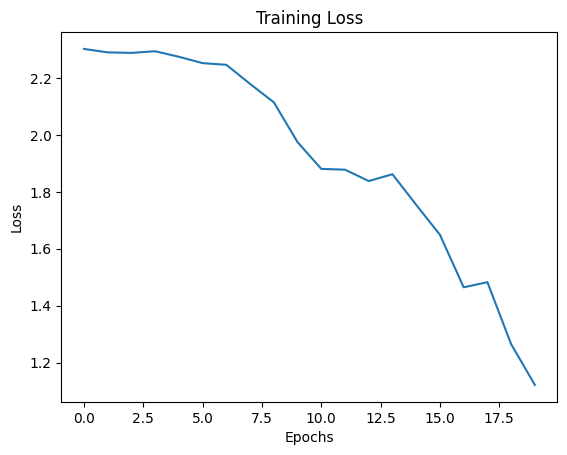

In [12]:

draw_train_hist(model1_hist)

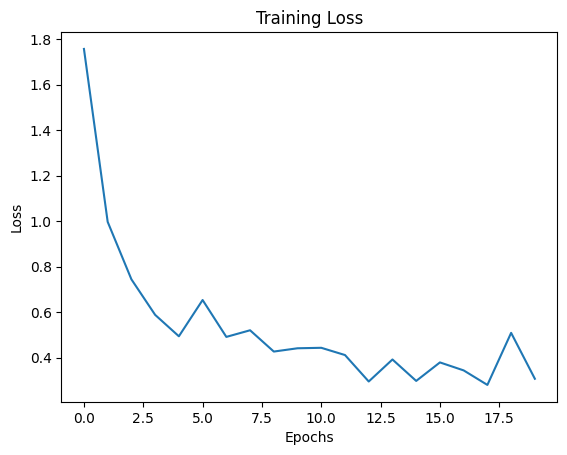

In [13]:
draw_train_hist(model2_hist)


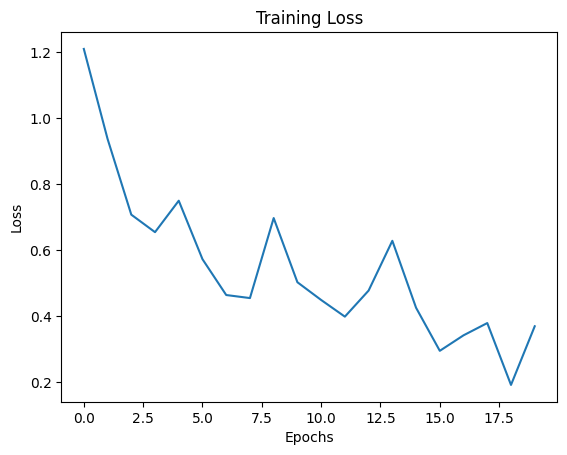

In [14]:
draw_train_hist(model3_hist)


In [15]:

print('Model1 Acc:', test_acc(test_dl, model1))
print('Model2 Acc:', test_acc(test_dl, model2))
print('Model3 Acc:', test_acc(test_dl, model3))

Model1 Acc: 49.39
Model2 Acc: 80.27
Model3 Acc: 78.28
